# Thực hiện quá trình dự báo trên mô hình ARIMA

## Thêm thư viện

In [1]:
import pandas as pd
import warnings
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVR
from pmdarima.arima import auto_arima
from sklearn.preprocessing import StandardScaler
from sklearn.utils import column_or_1d
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

warnings.filterwarnings('ignore')


## Nạp dữ liệu từ file csv

In [2]:
df_train = pd.read_csv("../../../Dataset/bitcoin_train_8_2.csv", parse_dates=True,
                       index_col=0).drop(columns=['Close', 'High', 'Low', 'Volume', 'Currency'])
df_index = df_train.index

df_close_train = df_train['Open'].values.copy().reshape(-1, 1)
df_train.head()


,Open
Date,
2020-06-01,9.4545
2020-06-02,10.1907
2020-06-03,9.5270
2020-06-04,9.6672
2020-06-05,9.7940


In [3]:
df_test = pd.read_csv("../../../Dataset/bitcoin_test_8_2.csv", parse_dates=True,
                      index_col=0).drop(columns=['Close', 'High', 'Low', 'Volume', 'Currency'])
df_index = df_test.index

df_close_test = df_test['Open'].values.copy().reshape(-1, 1)
df_test.head()


,Open
Date,
2022-01-07,43.0979
2022-01-08,41.5513
2022-01-09,41.6812
2022-01-10,41.8489
2022-01-11,41.8291


# Vẽ đồ thị

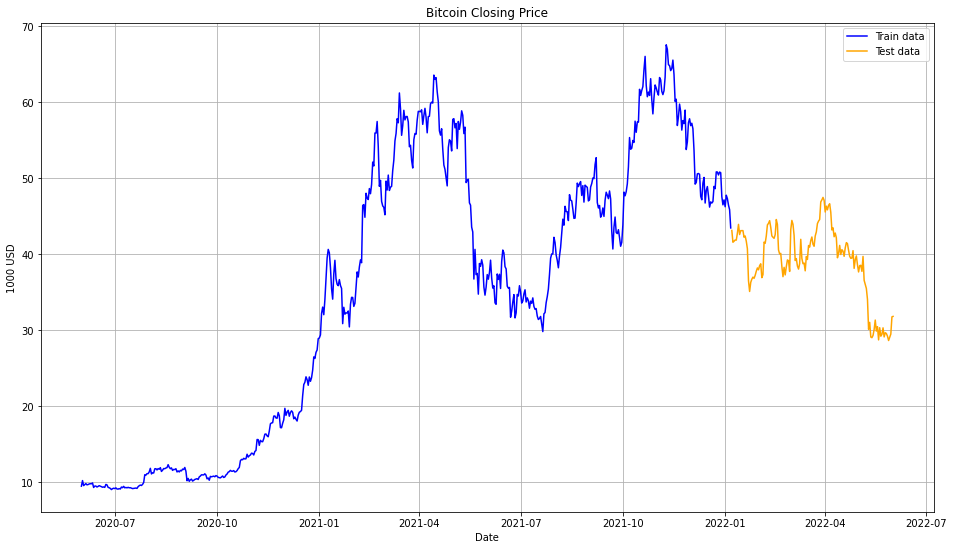

In [4]:
plt.figure(figsize=(16, 9))
plt.grid(True)
plt.title("Bitcoin Closing Price")
plt.xlabel('Date')
plt.ylabel('1000 USD')
plt.plot(df_train['Open'], 'blue', label='Train data')
plt.plot(df_test['Open'], 'orange', label='Test data')
plt.legend()


# Tách dữ liệu thành tập train và test

In [5]:
train_data, test_data = df_train, df_test
index_test = column_or_1d(df_test.index)
print(train_data.shape)
print(test_data.shape)


(585, 1)
(146, 1)


In [6]:
train_data

,Open
Date,
2020-06-01,9.4545
2020-06-02,10.1907
2020-06-03,9.5270
2020-06-04,9.6672
2020-06-05,9.7940
...,...
2022-01-02,47.7387
2022-01-03,47.2939
2022-01-04,46.4357


<h1>Xây dựng mô hình ARIMA để dự đoán giá Bitcoin theo chuỗi thời gian


In [7]:
warnings.filterwarnings('ignore')


def arima_model(ts_data):
    fit_model = auto_arima(ts_data, test='adf', seasonal=False, trace=True)
    return fit_model


In [8]:
fitted = arima_model(train_data)
fitted.summary()


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=2172.818, Time=0.59 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2169.466, Time=0.01 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2170.184, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2170.167, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2168.293, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2172.161, Time=0.24 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 0.944 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  585
Model:               SARIMAX(0, 1, 0)   Log Likelihood               -1083.147
Date:                Sun, 26 Jun 2022   AIC                           2168.293
Time:                        15:01:32   BIC                           2172.663
Sample:                             0   HQIC                          2169.996
                                - 585                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         2.3906      0.086     27.814      0.000       2.222       2.559
===================================================================================
Ljung-Box (L1) (Q):                   1.28   Jarque-Bera (JB):               274.52
Prob(Q):                              0.26   Prob(JB):                         0.00
Heteroskedasticity (H):              20.99   Skew:                            -0.19
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.34
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<h1> Dự đoán trên tập test

In [9]:
pred = fitted.predict(len(test_data))
pred


array([43.4316, 43.4316, 43.4316, 43.4316, 43.4316, 43.4316, 43.4316,
       43.4316, 43.4316, 43.4316, 43.4316, 43.4316, 43.4316, 43.4316,
       43.4316, 43.4316, 43.4316, 43.4316, 43.4316, 43.4316, 43.4316,
       43.4316, 43.4316, 43.4316, 43.4316, 43.4316, 43.4316, 43.4316,
       43.4316, 43.4316, 43.4316, 43.4316, 43.4316, 43.4316, 43.4316,
       43.4316, 43.4316, 43.4316, 43.4316, 43.4316, 43.4316, 43.4316,
       43.4316, 43.4316, 43.4316, 43.4316, 43.4316, 43.4316, 43.4316,
       43.4316, 43.4316, 43.4316, 43.4316, 43.4316, 43.4316, 43.4316,
       43.4316, 43.4316, 43.4316, 43.4316, 43.4316, 43.4316, 43.4316,
       43.4316, 43.4316, 43.4316, 43.4316, 43.4316, 43.4316, 43.4316,
       43.4316, 43.4316, 43.4316, 43.4316, 43.4316, 43.4316, 43.4316,
       43.4316, 43.4316, 43.4316, 43.4316, 43.4316, 43.4316, 43.4316,
       43.4316, 43.4316, 43.4316, 43.4316, 43.4316, 43.4316, 43.4316,
       43.4316, 43.4316, 43.4316, 43.4316, 43.4316, 43.4316, 43.4316,
       43.4316, 43.4

# Vẽ đồ thị cho tập test và kết quả dự đoán


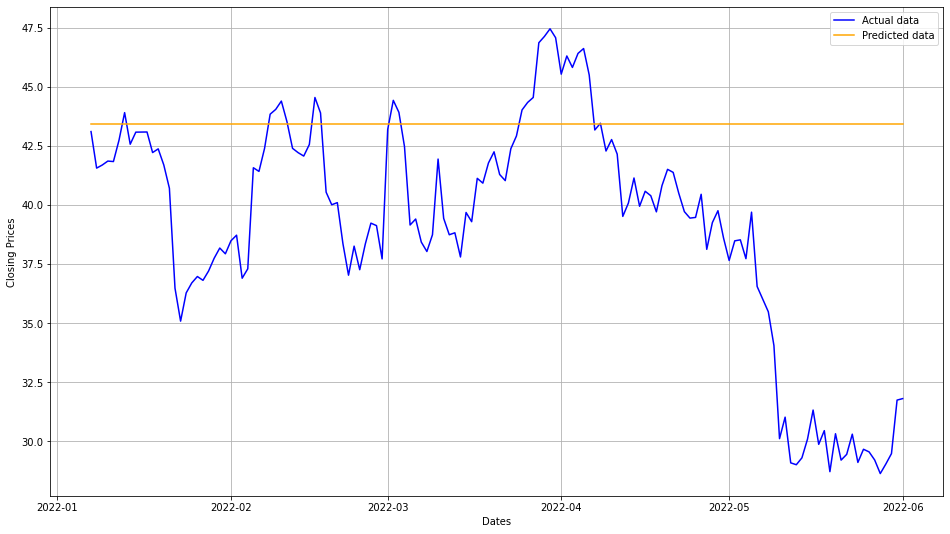

In [10]:
pred_series = pd.Series(pred, index=index_test)

plt.figure(figsize=(16, 9))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(test_data, 'blue', label='Actual data')
plt.plot(pred_series, 'orange', label='Predicted data')
plt.legend()


# Đánh giá mô hình

In [11]:
mape = mean_absolute_percentage_error(test_data.values, pred_series.values)
mse = mean_squared_error(test_data.values, pred_series.values)
rmse = np.sqrt(mse)
r2 = r2_score(test_data.values, pred_series.values)

print(f"MAPE: {mape * 100:.2f}%")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2*100:.2f}%")

MAPE: 14.14%
RMSE: 6.47
R2: -80.64%


# Tạo một DataFrame là 'df_pred' để lưu kết quả dự đoán trên mô hình ARIMA

In [12]:
df_pred = pd.DataFrame(index=index_test)
df_pred['actual'] = test_data.values
df_pred['arima'] = pred_series.values
df_pred['error'] = df_pred['actual'] - df_pred['arima']
df_pred


,actual,arima,error
2022-01-07,43.0979,43.4316,-0.3337
2022-01-08,41.5513,43.4316,-1.8803
2022-01-09,41.6812,43.4316,-1.7504
2022-01-10,41.8489,43.4316,-1.5827
2022-01-11,41.8291,43.4316,-1.6025
...,...,...,...
2022-05-28,28.6201,43.4316,-14.8115
2022-05-29,29.0271,43.4316,-14.4045
2022-05-30,29.4652,43.4316,-13.9664
2022-05-31,31.7302,43.4316,-11.7014


# Tạo thêm một DataFrame để tiến hành dự đoán sai số trên mô hình SVR

In [13]:
df_svr = df_pred.copy()
df_svr = df_svr.drop(columns=['actual', 'arima'])
timestamp = pd.to_datetime(df_svr.index).astype(np.int64) / 10**9
df_svr['timestamp'] = timestamp
df_svr.tail()

,error,timestamp
2022-05-28,-14.8115,1.653696e+09
2022-05-29,-14.4045,1.653782e+09
2022-05-30,-13.9664,1.653869e+09
2022-05-31,-11.7014,1.653955e+09
2022-06-01,-11.6385,1.654042e+09


In [14]:
svr_x_sc = StandardScaler()
svr_y_sc = StandardScaler()

x = df_svr.iloc[:, -1].values
y = df_svr.iloc[:, 0].values

x_scaled = svr_x_sc.fit_transform(x.reshape(-1, 1))
y_scaled = svr_y_sc.fit_transform(y.reshape(-1, 1))

print(x_scaled.shape)
print(y_scaled.shape)

(146, 1)
(146, 1)


<h1>Vẽ đồ thị thể hiện sai số

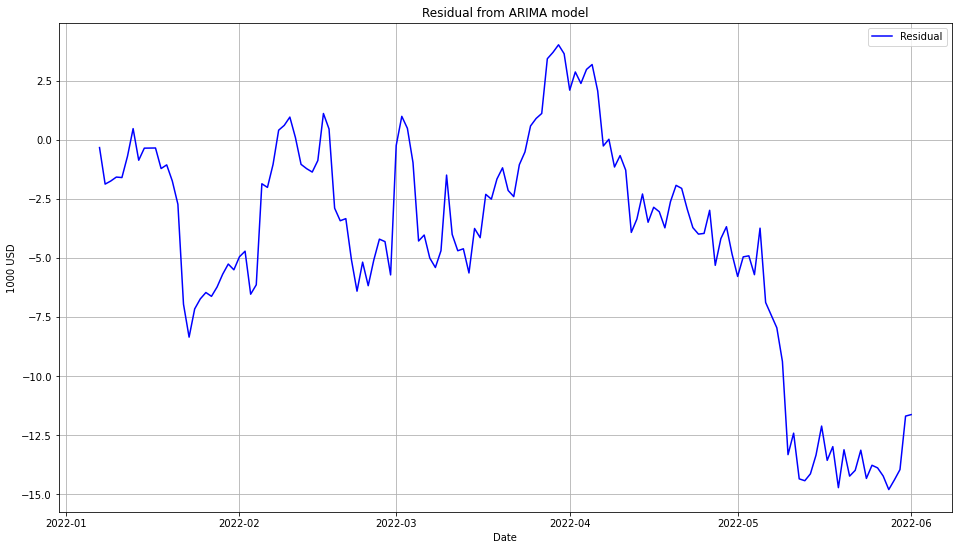

In [15]:
plt.figure(figsize=(16, 9))
plt.grid(True)
plt.title("Residual from ARIMA model")
plt.xlabel('Date')
plt.ylabel('1000 USD')
plt.plot(df_svr['error'], 'blue', label='Residual')
plt.legend()


## Hàm tạo hyperparameters

In [16]:
def para_range(minimum, maximum, step):
    para_list = np.arange(minimum, maximum, step)
    return para_list


def print_stats(hyperparams, stats):
    if(hyperparams[0] == 'poly'):
        print(
            f'SVR(kernel={hyperparams[0]}, C={hyperparams[1]}, gamma={hyperparams[2]}, degree={hyperparams[3]}')
    else:
        print(
            f'SVR(kernel={hyperparams[0]}, C={hyperparams[1]}, gamma={hyperparams[2]}')

    print(
        f"MSE={stats[0] :.2f} | RMSE={stats[1]:.2f}")


In [17]:
kernels = ['sigmoid', 'rbf', 'poly']
Cs = para_range(0.01, 0.2, 0.1)
gammas = para_range(0.1, 5, 0.1)
degrees = para_range(1, 6, 1)


## GridSearch để tìm hyperparameters phù hợp

In [18]:
warnings.filterwarnings('ignore')

stats_df = pd.DataFrame(
    columns=['kernel', 'C', 'gamma', 'degree',  'MSE', 'RMSE'])

# Sử dụng gird-seach để tìm hyperparameters phù hợp
for ker in kernels:
    # Nếu kernel == poly thì thực hiện chọn degree
    if(ker != 'poly'):
        for C in Cs:
            for gamma in gammas:
                rgs = SVR(kernel=ker, C=C, gamma=gamma, verbose=False)
                rgs.fit(x_scaled, y)
                pred = rgs.predict(x_scaled)

                # Đảo tỷ lệ thành giá trị thực
                inv_pred = svr_y_sc.inverse_transform(
                    column_or_1d(pred).reshape(-1, 1))
                inv_y = svr_y_sc.inverse_transform(
                    column_or_1d(y).reshape(-1, 1))

                # Đánh giá mô hình
                mse = mean_squared_error(inv_y, inv_pred)
                rmse = np.sqrt(mse)

                result = {'kernel': ker, 'C': C, 'gamma': gamma,
                          'degree': 0, 'MSE': mse, 'RMSE': rmse}

                hyperparam = [ker, C, gamma, 0]
                stats = [mse, rmse]
                stats_df = stats_df.append(result, ignore_index=True)
                print_stats(hyperparam, stats)
    else:
        for C in Cs:
            for gamma in gammas:
                for deg in degrees:
                    rgs = SVR(kernel=ker, C=C, gamma=gamma,
                              degree=deg, verbose=False)
                    rgs.fit(x_scaled, y)
                    pred = rgs.predict(x_scaled)

                    # Đảo tỷ lệ thành giá trị thực
                    inv_pred = svr_y_sc.inverse_transform(
                        column_or_1d(pred).reshape(-1, 1))
                    inv_y = svr_y_sc.inverse_transform(
                        column_or_1d(y).reshape(-1, 1))

                    # Đánh giá mô hình
                    mse = mean_squared_error(inv_y, inv_pred)
                    rmse = np.sqrt(mse)

                    hyperparam = [ker, C, gamma, deg]
                    stats = [mse, rmse]
                    result = {'kernel': ker, 'C': C, 'gamma': gamma, 'degree': deg,
                              'MSE': mse, 'RMSE': rmse}

                    stats_df = stats_df.append(result, ignore_index=True)

                    print_stats(hyperparam, stats)


SVR(kernel=sigmoid, C=0.01, gamma=0.1
MSE=544.98 | RMSE=23.34
SVR(kernel=sigmoid, C=0.01, gamma=0.2
MSE=541.16 | RMSE=23.26
SVR(kernel=sigmoid, C=0.01, gamma=0.30000000000000004
MSE=538.20 | RMSE=23.20
SVR(kernel=sigmoid, C=0.01, gamma=0.4
MSE=535.47 | RMSE=23.14
SVR(kernel=sigmoid, C=0.01, gamma=0.5
MSE=533.68 | RMSE=23.10
SVR(kernel=sigmoid, C=0.01, gamma=0.6
MSE=532.70 | RMSE=23.08
SVR(kernel=sigmoid, C=0.01, gamma=0.7000000000000001
MSE=532.33 | RMSE=23.07
SVR(kernel=sigmoid, C=0.01, gamma=0.8
MSE=532.88 | RMSE=23.08
SVR(kernel=sigmoid, C=0.01, gamma=0.9
MSE=533.80 | RMSE=23.10
SVR(kernel=sigmoid, C=0.01, gamma=1.0
MSE=534.35 | RMSE=23.12
SVR(kernel=sigmoid, C=0.01, gamma=1.1
MSE=535.01 | RMSE=23.13
SVR(kernel=sigmoid, C=0.01, gamma=1.2000000000000002
MSE=535.85 | RMSE=23.15
SVR(kernel=sigmoid, C=0.01, gamma=1.3000000000000003
MSE=536.73 | RMSE=23.17
SVR(kernel=sigmoid, C=0.01, gamma=1.4000000000000001
MSE=537.56 | RMSE=23.19
SVR(kernel=sigmoid, C=0.01, gamma=1.5000000000000002
MSE

In [19]:
best_fit_model = stats_df[stats_df['RMSE'] == stats_df['RMSE'].min()].head(1)
best_fit_model


,kernel,C,gamma,degree,MSE,RMSE
176,rbf,0.11,3.0,0,330.43414,18.177847


# Xây dựng mô hình SVR với các tham số vừa tìm được

In [20]:
kernel = str(best_fit_model['kernel'].values[0])
C = float(best_fit_model['C'])
gamma = float(best_fit_model['gamma'])
degree = int(best_fit_model['degree'])

if(kernel == 'poly'):
    rgs = SVR(kernel=kernel, C=C, gamma=gamma, degree=degree)
else:
    rgs = SVR(kernel=kernel, C=C, gamma=gamma)

rgs.fit(x_scaled, y_scaled)
pred = rgs.predict(x_scaled)
pred

array([ 0.48389185,  0.48136669,  0.47660816,  0.46970868,  0.46079602,
        0.4500316 ,  0.43760802,  0.42374567,  0.40868862,  0.39269985,
        0.37605574,  0.35904029,  0.34193885,  0.32503175,  0.3085879 ,
        0.2928586 ,  0.27807161,  0.26442581,  0.25208648,  0.24118141,
        0.23179794,  0.22398098,  0.21773226,  0.21301057,  0.20973325,
        0.20777876,  0.20699036,  0.20718071,  0.20813738,  0.20962908,
        0.21141244,  0.21323914,  0.2148633 ,  0.21604878,  0.21657637,
        0.21625047,  0.21490533,  0.21241043,  0.20867506,  0.20365184,
        0.19733919,  0.1897826 ,  0.18107472,  0.17135422,  0.16080353,
        0.14964538,  0.13813834,  0.12657144,  0.11525792,  0.10452837,
        0.09472336,  0.08618569,  0.07925259,  0.0742478 ,  0.07147401,
        0.07120553,  0.07368167,  0.07910062,  0.08761433,  0.09932427,
        0.11427817,  0.13246799,  0.15382899,  0.17823996,  0.20552468,
        0.23545453,  0.2677521 ,  0.30209594,  0.3381261 ,  0.37

# Vẽ đồ thị

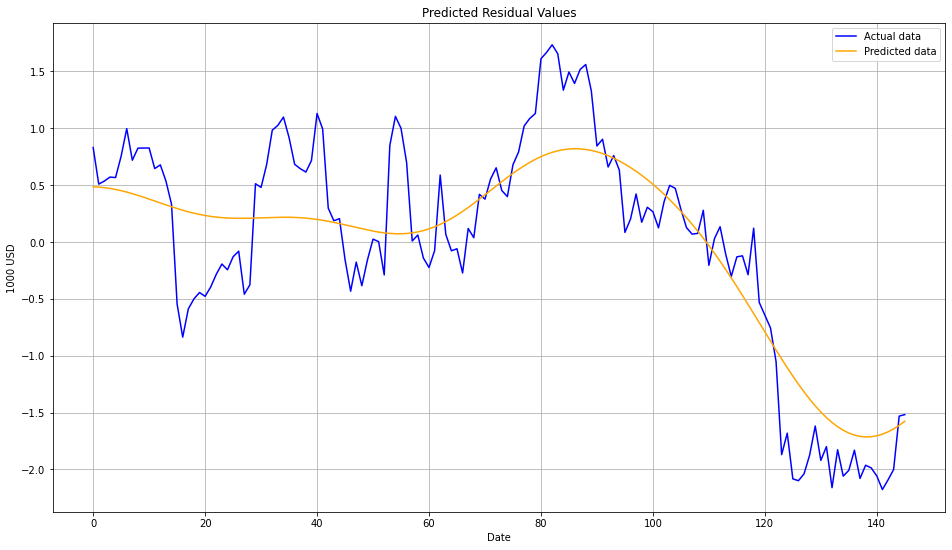

In [21]:
plt.figure(figsize=(16, 9))
plt.grid(True)
plt.title("Predicted Residual Values")
plt.xlabel('Date')
plt.ylabel('1000 USD')
plt.plot(column_or_1d(y_scaled), 'blue', label='Actual data')
plt.plot(column_or_1d(pred), 'orange', label='Predicted data')
plt.legend()


# Đưa giá trị về miền giá trị ban đầu

In [22]:
inv_pred = svr_y_sc.inverse_transform(pred.reshape(-1, 1))


In [23]:
df_pred['error_svr'] = inv_pred
df_pred['arima_svr'] = df_pred['arima'] + df_pred['error_svr']
df_pred.tail()

,actual,arima,error,error_svr,arima_svr
2022-05-28,28.6201,43.4316,-14.8115,-12.465541,30.966059
2022-05-29,29.0271,43.4316,-14.4045,-12.367901,31.063699
2022-05-30,29.4652,43.4316,-13.9664,-12.243251,31.188349
2022-05-31,31.7302,43.4316,-11.7014,-12.093323,31.338277
2022-06-01,31.7931,43.4316,-11.6385,-11.920042,31.511558


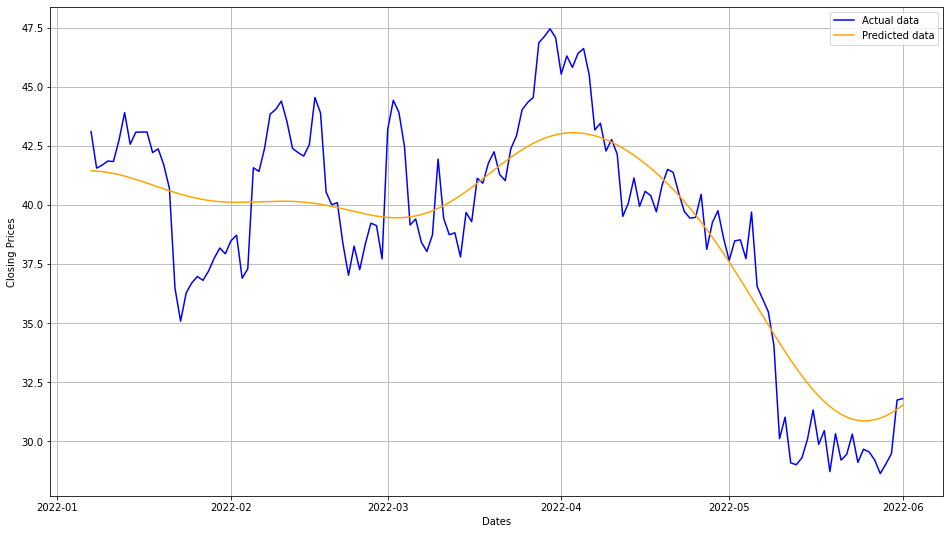

In [24]:
plt.figure(figsize=(16, 9))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(df_pred['actual'], 'blue', label='Actual data')
plt.plot(df_pred['arima_svr'], 'orange', label='Predicted data')
plt.legend()


# Đánh giá mô hình

In [25]:
mape = mean_absolute_percentage_error(df_pred['actual'].values, df_pred['arima_svr'].values)
mse = mean_squared_error(df_pred['actual'].values, df_pred['arima_svr'].values)
rmse = np.sqrt(mse)
r2 = r2_score(df_pred['actual'].values, df_pred['arima_svr'].values)

print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape * 100:.2f}%")
print(f"R-Squared: {r2:.2f}")


RMSE: 2.23
MAPE: 4.70%
R-Squared: 0.79
